In [1]:
import seaborn as sns
from bs4 import BeautifulSoup
import re
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from submodule.openai_api import split2pieces,assgin_prompts
import yaml
import os

SyntaxError: invalid syntax (pdf_parser.py, line 371)

## preprocessing

In [ ]:
cs_2023_file_dir = "./res/cs_2023/raw_mmd"
cs_2017_file_dir = "./res/cs_2017/raw_mmd"
math_2023_file_dir = "./res/math_2023/raw_mmd"
cs_2023_file_list = [os.path.join(cs_2023_file_dir,file_name) for file_name in os.listdir(cs_2023_file_dir)]
cs_2017_file_list = [os.path.join(cs_2017_file_dir,file_name) for file_name in os.listdir(cs_2017_file_dir)]
math_2023_file_list = [os.path.join(math_2023_file_dir,file_name) for file_name in os.listdir(math_2023_file_dir)]
prompts_path = './prompts_config.json'
with open(prompts_path, "r") as f:
    prompts_config = json.load(f)

config_path = "config.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

ignore_titles = config["openai"]["ignore_title"]
openai_info = config["openai"]
summary_prompts = prompts_config["section summary"]
summary_prompts.pop("system")
resummary_prompts = prompts_config["blog summary"]
arxiv_info = config['arxiv']
nougat_info = config["nougat"]
proxy = arxiv_info['proxy']
arxiv_info = config['arxiv']
ignore_titles = openai_info['ignore_title']
headers = arxiv_info['headers']
base_url = openai_info['base_url']


In [3]:
def section_stastic(file_name):
    with open(file_name, "r",encoding="utf-8") as f:
        file_text = f.read()
    _,_,_,chunks,_ = split2pieces(file_text,file_name=file_name,ignore_title=ignore_titles)
    subtitles,_,lengths = zip(*[(*assgin_prompts(summary_prompts,chunk[0],replace=False),chunk[-1]) for chunk in chunks])

    return subtitles,lengths

def concat_pd(file_list,
              prompts:dict):
    df = pd.DataFrame(columns=list(prompts.keys()) + ['avg_length'])
    for file_name in file_list:
        subtitles,lengths = section_stastic(file_name)
        for subtitle,length in zip(subtitles,lengths):
            if file_name not in df.index:   # Add a new row for 'file_name' if it does not exist yet
                df.loc[file_name] = [np.nan]*len(df.columns)
            if pd.isnull(df.loc[file_name,subtitle]):   # Use pandas .isnull() to check for None, NaN etc.
                df.loc[file_name,subtitle] = length
            else:
                df.loc[file_name,subtitle] += length
        df.loc[file_name,'avg_length'] = sum(lengths)/len(lengths)
    return df

## cs_2023

In [4]:
cs_2023_df = concat_pd(cs_2023_file_list,summary_prompts)
cs_2023_df = cs_2023_df.sort_values(by='avg_length',ascending=False)
rename_map = {
    "intro":"Introduction",
    "abs":"Abstract",
    "background":"Background",
    "related work":"Related Work",
    "model":"Model",
    "experiment":"Experiment",
    "conclusion":"Conclusion",
    "method":"Method",
    "discussion":"Discussion",
    "future":"Future Work",
    "limit":"Limitation",
    "dataset":"Dataset",
}
cs_2023_df = cs_2023_df.rename(columns=rename_map)

ERROR:root:article :./res/cs_2023/raw_mmd\2312_14930.mmd,Title not found, parser error
INFO:root:finish split with 6 parts,including 1tables, split grid:2(i.e. ##),max length of part:447,details:
file_name:./res/cs_2023/raw_mmd\2312_14930.mmd，after split:
subtitle:## Abstract                          subtext:'A new networ...Vol. 6, No. 2'   length of subtext:233
subtitle:## 1 Introduction                    subtext:'Digital Twin...were covered.'   length of subtext:447
subtitle:## 2 Related Work                    subtext:'Many researc...applications.'   length of subtext:227
subtitle:## 3 Digital Twin Network Architecture subtext:'The architec...ort networks.'   length of subtext:318
subtitle:## 4 Data Type in Digital Twin Network subtext:'The process ... scalability.'   length of subtext:158
subtitle:## 5 Conclusion                      subtext:'In this pape... such system.'   length of subtext:172

Tables:
table:'\\begin{tabl...n\\end{table}'                caption:'Table 1: Dig...N

In [5]:
cs_2023_df

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
./res/cs_2023/raw_mmd\2312_15011.mmd,15484.0,NaN,NaN,NaN,NaN,NaN,6815.0,NaN,NaN,NaN,NaN,NaN,NaN,7719.0,7504.500000
./res/cs_2023/raw_mmd\2312_15024.mmd,357.0,2368.0,NaN,NaN,NaN,NaN,169.0,NaN,NaN,NaN,NaN,NaN,NaN,20722.0,3936.000000
./res/cs_2023/raw_mmd\2312_15003.mmd,NaN,NaN,NaN,NaN,NaN,NaN,766.0,1187.0,NaN,NaN,NaN,NaN,NaN,15004.0,2826.166667
./res/cs_2023/raw_mmd\2312_14935.mmd,NaN,10329.0,NaN,NaN,NaN,NaN,NaN,NaN,746.0,NaN,NaN,NaN,NaN,3243.0,2386.333333
./res/cs_2023/raw_mmd\2312_15023.mmd,272.0,3422.0,NaN,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,NaN,NaN,7922.0,2359.000000
./res/cs_2023/raw_mmd\2312_14964.mmd,194.0,3735.0,NaN,NaN,NaN,NaN,655.0,NaN,NaN,NaN,NaN,NaN,NaN,8836.0,2236.666667
./res/cs_2023/raw_mmd\2312_14963.mmd,458.0,6365.0,NaN,NaN,NaN,NaN,355.0,1476.0,NaN,NaN,NaN,NaN,NaN,NaN,2163.500000
./res/cs_2023/raw_mmd\2312_14973.mmd,NaN,NaN,NaN,1078.0,NaN,NaN,839.0,4931.0,NaN,NaN,NaN,NaN,NaN,1732.0,2145.000000
./res/cs_2023/raw_mmd\2312_15004.mmd,332.0,1545.0,NaN,NaN,NaN,4125.0,NaN,NaN,NaN,NaN,1740.0,NaN,NaN,NaN,1935.500000
./res/cs_2023/raw_mmd\2312_14950.mmd,313.0,1201.0,1555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9680.0,1821.285714


In [6]:
cs_2023_df.to_csv("./res/cs_2023/basic_info.csv")

<Axes: >

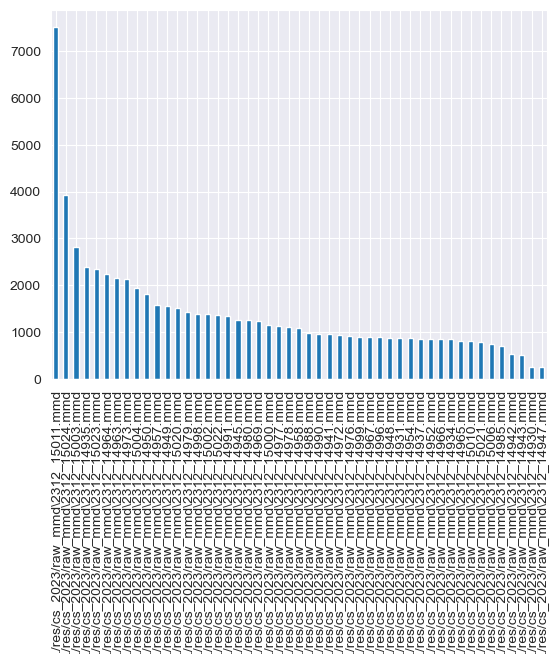

In [7]:
cs_2023_df["avg_length"].plot(kind="bar")


In [8]:
cs_2023_df.describe()

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
count,40.000000,43.000000,5.000000,23.000000,9.000000,20.000000,37.000000,17.000000,9.000000,0.0,16.000000,2.000000,1.0,39.000000,49.000000
mean,643.500000,1442.790698,997.800000,840.956522,1969.000000,2206.850000,502.783784,2011.882353,1271.555556,NaN,1766.312500,1399.000000,38.0,4561.871795,1389.213554
std,2407.660595,1761.602525,469.007143,404.343292,1354.373656,1405.048052,1099.384579,1566.059461,766.467891,NaN,1313.585867,864.084487,NaN,4152.366276,1120.299493
min,98.000000,350.000000,398.000000,227.000000,461.000000,588.000000,84.000000,596.000000,297.000000,NaN,311.000000,788.000000,38.0,139.000000,257.400000
25%,223.000000,685.500000,799.000000,574.000000,1021.000000,1389.000000,169.000000,1187.000000,905.000000,NaN,1008.500000,1093.500000,38.0,1558.500000,858.375000
50%,259.000000,925.000000,853.000000,716.000000,1774.000000,1784.500000,225.000000,1512.000000,1110.000000,NaN,1469.000000,1399.000000,38.0,3685.000000,1083.000000
75%,310.000000,1395.500000,1384.000000,1126.000000,2285.000000,2632.750000,431.000000,1976.000000,1425.000000,NaN,1805.250000,1704.500000,38.0,6833.000000,1514.900000
max,15484.000000,10329.000000,1555.000000,1733.000000,4402.000000,6483.000000,6815.000000,6667.000000,3015.000000,NaN,5181.000000,2010.000000,38.0,20722.000000,7504.500000


In [9]:
cs_2023_df_simple = cs_2023_df[1:]
cs_2023_df_simple

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
./res/cs_2023/raw_mmd\2312_15024.mmd,357.0,2368.0,NaN,NaN,NaN,NaN,169.0,NaN,NaN,NaN,NaN,NaN,NaN,20722.0,3936.000000
./res/cs_2023/raw_mmd\2312_15003.mmd,NaN,NaN,NaN,NaN,NaN,NaN,766.0,1187.0,NaN,NaN,NaN,NaN,NaN,15004.0,2826.166667
./res/cs_2023/raw_mmd\2312_14935.mmd,NaN,10329.0,NaN,NaN,NaN,NaN,NaN,NaN,746.0,NaN,NaN,NaN,NaN,3243.0,2386.333333
./res/cs_2023/raw_mmd\2312_15023.mmd,272.0,3422.0,NaN,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,NaN,NaN,7922.0,2359.000000
./res/cs_2023/raw_mmd\2312_14964.mmd,194.0,3735.0,NaN,NaN,NaN,NaN,655.0,NaN,NaN,NaN,NaN,NaN,NaN,8836.0,2236.666667
./res/cs_2023/raw_mmd\2312_14963.mmd,458.0,6365.0,NaN,NaN,NaN,NaN,355.0,1476.0,NaN,NaN,NaN,NaN,NaN,NaN,2163.500000
./res/cs_2023/raw_mmd\2312_14973.mmd,NaN,NaN,NaN,1078.0,NaN,NaN,839.0,4931.0,NaN,NaN,NaN,NaN,NaN,1732.0,2145.000000
./res/cs_2023/raw_mmd\2312_15004.mmd,332.0,1545.0,NaN,NaN,NaN,4125.0,NaN,NaN,NaN,NaN,1740.0,NaN,NaN,NaN,1935.500000
./res/cs_2023/raw_mmd\2312_14950.mmd,313.0,1201.0,1555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9680.0,1821.285714
./res/cs_2023/raw_mmd\2312_14957.mmd,235.0,1183.0,NaN,1290.0,4402.0,NaN,233.0,NaN,NaN,NaN,3441.0,NaN,NaN,1820.0,1575.500000


In [10]:
cs_2023_df_simple.describe()

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
count,39.000000,43.000000,5.000000,23.000000,9.000000,20.000000,36.000000,17.000000,9.000000,0.0,16.000000,2.000000,1.0,38.000000,48.000000
mean,262.974359,1442.790698,997.800000,840.956522,1969.000000,2206.850000,327.444444,2011.882353,1271.555556,NaN,1766.312500,1399.000000,38.0,4478.789474,1261.811753
std,70.472274,1761.602525,469.007143,404.343292,1354.373656,1405.048052,270.471487,1566.059461,766.467891,NaN,1313.585867,864.084487,NaN,4175.125104,685.217452
min,98.000000,350.000000,398.000000,227.000000,461.000000,588.000000,84.000000,596.000000,297.000000,NaN,311.000000,788.000000,38.0,139.000000,257.400000
25%,223.000000,685.500000,799.000000,574.000000,1021.000000,1389.000000,166.750000,1187.000000,905.000000,NaN,1008.500000,1093.500000,38.0,1471.750000,858.156250
50%,254.000000,925.000000,853.000000,716.000000,1774.000000,1784.500000,221.000000,1512.000000,1110.000000,NaN,1469.000000,1399.000000,38.0,3574.000000,1029.666667
75%,306.000000,1395.500000,1384.000000,1126.000000,2285.000000,2632.750000,394.250000,1976.000000,1425.000000,NaN,1805.250000,1704.500000,38.0,6606.250000,1457.475000
max,458.000000,10329.000000,1555.000000,1733.000000,4402.000000,6483.000000,1405.000000,6667.000000,3015.000000,NaN,5181.000000,2010.000000,38.0,20722.000000,3936.000000


## cs_2017

In [11]:
cs_2017_df = concat_pd(cs_2017_file_list,summary_prompts)
cs_2017_df = cs_2017_df.sort_values(by='avg_length',ascending=False)
cs_2017_df = cs_2017_df.rename(columns=rename_map)
cs_2017_df

INFO:root:article :./res/cs_2017/raw_mmd\1506_01186.mmd,parse author and affiliation with NER successfully
INFO:root:finish split with 6 parts,including 3tables, split grid:2(i.e. ##),max length of part:3144,details:
file_name:./res/cs_2017/raw_mmd\1506_01186.mmd，after split:
subtitle:## Abstract                          subtext:'It is known ...ral networks.'   length of subtext:206
subtitle:## 1 Introduction                    subtext:'Deep neural ...ogleNet [25].'   length of subtext:554
subtitle:## 2 Related work                    subtext:'The book "Ne...red recently.'   length of subtext:649
subtitle:## 3 Optimal Learning Rates          subtext:'### Cyclical... experiments.'   length of subtext:1479
subtitle:## 4 Experiments                     subtext:'The purpose ...$exp$ policy.'   length of subtext:3144
subtitle:## 5 Conclusions                     subtext:'The results ...e algorithms.'   length of subtext:249

Tables:
table:'\\begin{tabl...n\\end{table}'                captio

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
./res/cs_2017/raw_mmd\1704_00829.mmd,2165.0,1821.0,NaN,NaN,2581.0,12557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13464.0,3258.800000
./res/cs_2017/raw_mmd\1704_04422.mmd,336.0,2386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9178.0,2380.000000
./res/cs_2017/raw_mmd\1605_06914.mmd,215.0,2831.0,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,6065.0,NaN,NaN,5781.0,2154.857143
./res/cs_2017/raw_mmd\1605_09782.mmd,172.0,1173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9242.0,2117.400000
./res/cs_2017/raw_mmd\1704_01466.mmd,252.0,1793.0,898.0,NaN,NaN,5975.0,NaN,1007.0,NaN,NaN,NaN,NaN,NaN,NaN,1985.000000
./res/cs_2017/raw_mmd\1704_01297.mmd,276.0,1210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7037.0,1704.600000
./res/cs_2017/raw_mmd\1701_02632.mmd,314.0,1173.0,NaN,NaN,NaN,NaN,NaN,NaN,1919.0,426.0,NaN,NaN,NaN,5645.0,1579.500000
./res/cs_2017/raw_mmd\1704_00524.mmd,219.0,1065.0,NaN,861.0,NaN,NaN,126.0,NaN,NaN,NaN,4284.0,NaN,NaN,2834.0,1564.833333
./res/cs_2017/raw_mmd\1703_08961.mmd,231.0,843.0,NaN,NaN,NaN,NaN,331.0,NaN,NaN,NaN,NaN,NaN,NaN,7712.0,1519.500000
./res/cs_2017/raw_mmd\1704_01249.mmd,263.0,876.0,NaN,961.0,NaN,NaN,253.0,NaN,NaN,NaN,2791.0,NaN,NaN,8356.0,1500.000000


In [12]:
cs_2017_df.describe()

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
count,50.000000,47.000000,2.000000,27.000000,2.00000,13.000000,41.000000,17.000000,7.000000,2.000000,23.000000,2.000000,0.0,45.000000,50.000000
mean,298.100000,1061.319149,914.500000,826.333333,2203.50000,3429.615385,195.731707,1222.235294,683.857143,285.000000,2048.521739,628.500000,NaN,3679.822222,1190.256556
std,324.076474,506.018478,23.334524,214.899977,533.86562,3063.325359,85.158683,716.676490,576.981637,199.404112,1293.863098,31.819805,NaN,2732.939412,506.821861
min,113.000000,436.000000,898.000000,474.000000,1826.00000,1347.000000,74.000000,222.000000,221.000000,144.000000,169.000000,606.000000,NaN,197.000000,546.666667
25%,189.000000,774.000000,906.250000,708.500000,2014.75000,1526.000000,132.000000,726.000000,374.500000,214.500000,1124.000000,617.250000,NaN,1755.000000,838.571429
50%,222.500000,943.000000,914.500000,765.000000,2203.50000,2455.000000,178.000000,1101.000000,498.000000,285.000000,1771.000000,628.500000,NaN,2831.000000,1085.500000
75%,260.750000,1191.000000,922.750000,975.000000,2392.25000,3779.000000,246.000000,1683.000000,700.000000,355.500000,2649.000000,639.750000,NaN,4229.000000,1366.100000
max,2165.000000,2831.000000,931.000000,1344.000000,2581.00000,12557.000000,521.000000,2725.000000,1919.000000,426.000000,6065.000000,651.000000,NaN,13464.000000,3258.800000


In [13]:
cs_2017_df.to_csv("./res/cs_2017/basic_info.csv")


## math_2023

In [14]:
math_2023_df = concat_pd(math_2023_file_list,summary_prompts)
math_2023_df = math_2023_df.sort_values(by='avg_length',ascending=False)
math_2023_df = math_2023_df.rename(columns=rename_map)
math_2023_df

INFO:root:article :./res/math_2023/raw_mmd\2312_14956.mmd,parse author and affiliation with NER successfully
INFO:root:article :./res/math_2023/raw_mmd\2312_14956.mmd,parse author and affiliation with NER successfully
INFO:root:finish split with 24 parts,including 0tables, split grid:3(i.e. ###),max length of part:5658,details:
file_name:./res/math_2023/raw_mmd\2312_14956.mmd，after split:
subtitle:## Abstract                          subtext:'In 1883, Dar... for the axis'   length of subtext:694
subtitle:## 1 Introduction                    subtext:'Isothermic s...nd Dynamics".'   length of subtext:1711
subtitle:## 2 Preliminaries                   subtext:'### Structur...). \\tag{6}$$'   length of subtext:1033
subtitle:### Christoffel dual isothermic surface subtext:'Let $D\\subs...ot respected.'   length of subtext:213
subtitle:### Quaternionic description of surfaces subtext:'We construct...by $|q|^{2}$.'   length of subtext:1343
subtitle:## 3 Isothermic surfaces with one family of 

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
./res/math_2023/raw_mmd\2312_15149.mmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229390.0,16385.000000
./res/math_2023/raw_mmd\2312_15105.mmd,16385.0,NaN,16385.0,NaN,65540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163850.0,16385.000000
./res/math_2023/raw_mmd\2312_15093.mmd,110.0,15205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7657.500000
./res/math_2023/raw_mmd\2312_15147.mmd,248.0,4525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33703.0,5496.571429
./res/math_2023/raw_mmd\2312_15019.mmd,NaN,3187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11137.0,4774.666667
./res/math_2023/raw_mmd\2312_15007.mmd,176.0,2821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24126.0,4520.500000
./res/math_2023/raw_mmd\2312_15110.mmd,163.0,1653.0,NaN,NaN,NaN,NaN,NaN,12564.0,NaN,NaN,NaN,NaN,NaN,3197.0,4394.250000
./res/math_2023/raw_mmd\2312_15025.mmd,171.0,3863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24206.0,4034.285714
./res/math_2023/raw_mmd\2312_15024.mmd,357.0,2368.0,NaN,NaN,NaN,NaN,169.0,NaN,NaN,NaN,NaN,NaN,NaN,20722.0,3936.000000
./res/math_2023/raw_mmd\2312_15128.mmd,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19316.0,3891.800000


In [15]:
math_2023_df.describe()

,Abstract,Introduction,Background,Related Work,Model,Method,Conclusion,result,Discussion,Future Work,Experiment,Dataset,Limitation,general_summary,avg_length
count,28.000000,24.000000,3.00000,0.0,4.000000,1.0,9.000000,5.000000,1.0,2.000000,0.0,0.0,0.0,29.000000,32.000000
mean,1050.678571,2497.333333,7750.00000,NaN,20042.750000,850.0,532.000000,4562.400000,2102.0,366.500000,NaN,NaN,NaN,30519.482759,4049.633767
std,3111.788911,2885.337666,7880.04816,NaN,30587.799086,NaN,709.533121,4759.288529,NaN,177.483802,NaN,NaN,NaN,49281.433448,3505.440440
min,94.000000,715.000000,948.00000,NaN,1086.000000,850.0,169.000000,1078.000000,2102.0,241.000000,NaN,NaN,NaN,3197.000000,1083.000000
25%,150.500000,1248.500000,3432.50000,NaN,2684.250000,850.0,180.000000,1187.000000,2102.0,303.750000,NaN,NaN,NaN,9638.000000,2545.816667
50%,187.000000,1732.500000,5917.00000,NaN,6772.500000,850.0,230.000000,2898.000000,2102.0,366.500000,NaN,NaN,NaN,15004.000000,3337.375000
75%,288.250000,2481.250000,11151.00000,NaN,24131.000000,850.0,448.000000,5085.000000,2102.0,429.250000,NaN,NaN,NaN,24126.000000,3960.571429
max,16385.000000,15205.000000,16385.00000,NaN,65540.000000,850.0,2352.000000,12564.000000,2102.0,492.000000,NaN,NaN,NaN,229390.000000,16385.000000


In [16]:
math_2023_df.to_csv("./res/math_2023/basic_info.csv")

## collection of summary

In [17]:
from submodule.openai_api import OpenAI_Summarizer
rate_limit = None

summerizer = OpenAI_Summarizer(openai_info['api_key'],
                               proxy,
                               summary_prompts=summary_prompts,
                               resummry_prompts=resummary_prompts,
                               ignore_titles=ignore_titles,
                           acquire_mode='url',
                               num_processes=6,
                               base_url=base_url,requests_per_minute=rate_limit,
                           model_config = openai_info['model_config']
                             )
summerizer


OpenAI_Summarizer(model=gpt-3.5-turbo-16k-0613,
api_key:'sk-nRjm3MuSf...3046c0587B01c',
proxy_info:{'ftp': 'ftp://127.0.0.1:7890', 'host': 'http://localhost:7890', 'http': 'http://127.0.0.1:7890', 'https': 'http://127.0.0.1:7890'},
split_mode:group,
prompt_factor:0.8,
ignore_titles:['references', 'appendix', 'acknowledg'],
num_processes:6,
requests_per_minute:None,
base_url:https://api.ai-gaochao.cn/v1,
model_config:
model:gpt-3.5-turbo-16k-0613,
   temperature:0.5,
   max_tokens:16385,
   top_p:1.0,
   frequency_penalty:0.1,
   presence_penalty:0.2)

In [18]:
from tqdm import tqdm
from submodule.img_parser import parser_img_from_pdf
from submodule.my_utils import save_mmd_file
from pathlib import Path
def summary_file_ls(summerizer,
                    file_list,
                    pdf_list,
                    out_dir="./res/cs_2023/temp"):
    file_paths = []
    file_list = tqdm(file_list,position=0, leave=True)
    for file_path,pdf_path in zip(file_list,pdf_list):
        file_name = os.path.basename(file_path)
        filename = file_name.split(".")[0]
        save_dir = out_dir + f"/{filename}"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        file_list.set_description("Processing %s" % file_name)
        with open(file_path, "r",encoding="utf-8") as f:
            file_text = f.read()
        titles, authors, affiliations, summaries, re_respnse = summerizer.summary_with_openai(file_text,file_name=filename)
        with open(os.path.join(out_dir, filename + ".md"), "w",encoding="utf-8") as f:
            f.write("# [Summary]\n\n"+summaries+"\n\n# [ReSummary]\n\n"+re_respnse)

        img_paths = parser_img_from_pdf(pdf_path=pdf_path,save_dir=os.path.join(save_dir,"img"))
        img_content = "# Images & Tables:\n\n"
        for i,img_path in enumerate(img_paths):
            img_path = "./img/" + os.path.basename(img_path)
            img_content += f"![Image {i}]({img_path})\n\n"
        table = "# Tables:\n"+"\n\n\n".join(re_respnse[-1])
        re_respnse = "\n\n".join(re_respnse[:-1])
        summaries = img_content + table + summaries
        re_respnse = img_content + table + re_respnse
        raw_file_name = Path(file_name).stem + "_raw_" + ".mmd"
        inter_file_name = Path(file_name).stem + "_integrate_" + ".mmd"
        file_paths = save_mmd_file(save_texts=[summaries, re_respnse], file_names=[raw_file_name, inter_file_name],
                                  save_dirs=[save_dir, save_dir])
        file_paths.append(file_path)
    return file_paths

def transfer2pdf(file_list):
    file_ls = []
    for file in file_list:
        file = file.replace("raw_mmd","pdf").replace("mmd","pdf")
        file = os.path.join(os.path.dirname(file),os.path.basename(file).replace('_','.'))
        file_ls.append(file)
    return file_ls
cs_2023_pdf_list = transfer2pdf(cs_2023_file_list)
cs_2023_pdf_list[:5],cs_2023_file_list[:5]

(['./res/cs_2023/pdf\\2312.14930.pdf',
  './res/cs_2023/pdf\\2312.14931.pdf',
  './res/cs_2023/pdf\\2312.14934.pdf',
  './res/cs_2023/pdf\\2312.14935.pdf',
  './res/cs_2023/pdf\\2312.14937.pdf'],
 ['./res/cs_2023/raw_mmd\\2312_14930.mmd',
  './res/cs_2023/raw_mmd\\2312_14931.mmd',
  './res/cs_2023/raw_mmd\\2312_14934.mmd',
  './res/cs_2023/raw_mmd\\2312_14935.mmd',
  './res/cs_2023/raw_mmd\\2312_14937.mmd'])

In [19]:
file_paths = summary_file_ls(summerizer,
                             file_list=cs_2023_file_list[:2],
                             pdf_list= cs_2023_pdf_list[:2],
                             out_dir="./res/cs_2023/summary")


Processing 2312_14930.mmd:   0%|          | 0/2 [00:00<?, ?it/s]INFO:root:Summary with OpenAI: Step 1 - Splitting article. Split mode: group
ERROR:root:article :2312_14930,Title not found, parser error
INFO:root:finish split with 6 parts,including 1tables, split grid:2(i.e. ##),max length of part:447,details:
file_name:2312_14930，after split:
subtitle:## Abstract                          subtext:'A new networ...Vol. 6, No. 2'   length of subtext:233
subtitle:## 1 Introduction                    subtext:'Digital Twin...were covered.'   length of subtext:447
subtitle:## 2 Related Work                    subtext:'Many researc...applications.'   length of subtext:227
subtitle:## 3 Digital Twin Network Architecture subtext:'The architec...ort networks.'   length of subtext:318
subtitle:## 4 Data Type in Digital Twin Network subtext:'The process ... scalability.'   length of subtext:158
subtitle:## 5 Conclusion                      subtext:'In this pape... such system.'   length of subtext:1

multi_resp before filter:

multi_resp 0:
 The abstract of the paper introduces the concept of the Digital Twin Network (DTN), which utilizes Digital Twin (DT) technology to create virtual replicas of real objects. The paper acknowledges that the growth of 5G, Internet of Things (IoT), cloud computing, and new network services has led to increased network load and size, making network operation and maintenance more challenging. 

The primary focus of the research is to propose a data-driven digital twin network architecture that encompasses the physical network layer, digital twin layer, and application layer. The paper also addresses the framework of the Industrial Internet of Things and data processing in relation to the digital twin network.

The paper introduces DTN data types and protocols for data integration within the network. By utilizing the proposed architecture and protocols, the paper suggests that network operation and maintenance can be simplified, allowing for better man

total 2 section | num_processes:6 | requests_per_minute:None: 100%|██████████| 2/2 [00:00<?, ?it/s]
INFO:root:Step 4 :Start to translate latex table to markdown format with 1 prompts
INFO:root:connect openai api through url:https://api.ai-gaochao.cn/v1, with 6 processes without rate limit
total 1 section | num_processes:6 | requests_per_minute:None: 100%|██████████| 1/1 [00:00<?, ?it/s]
INFO:root:latex2md_table error_idx:[]
INFO:root:Finished summarizing article, with the titles:
Processing 2312_14930.mmd:   0%|          | 0/2 [00:56<?, ?it/s]

markdown_to_latex resp:
 | Data Types      | Protocols                           | Description                                                                                           |
| --------------- | ----------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **Time Series Data** | MQTT, OPC UA, REST, CoAP, and AMQP | Information from sensors or performance metrics obtained data in real-time.                         |
| **Event Data**      | AMQP, MQTT, CoAP, Syslog, DDS, and JMS | Devices, applications, and systems that generate logs that capture events, failures, and activities. |

Please note that the markdown format does not support bold text in table cells.
before_filter,integrated res:
 ## Integration Draft:

The paper introduces the concept of the Digital Twin Network (DTN) in the abstract, which utilizes Digital Twin (DT) technology to create virtual replicas of real objects. It acknowled

TypeError: can only concatenate str (not "list") to str

## evaluation

In [2]:
from submodule.my_utils import Evaluator
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("arxiv summarizer method")
doc.ents

(arxiv,)

In [4]:
import os
sum_dir = "./res/cs_2023/summary/"
arxiv_sum_dir = os.path.join(sum_dir,"arxiv_sum","summary_only")
GPT_4_sum_dir = os.path.join(sum_dir,"GPT_4_sum")
raw_mmd = "./res/cs_2023/raw_mmd"
arxiv_sum_ls = [os.path.join(arxiv_sum_dir,file_name) for file_name in os.listdir(arxiv_sum_dir)]
GPT_4_sum_ls = [os.path.join(GPT_4_sum_dir,file_name) for file_name in os.listdir(GPT_4_sum_dir)]
raw_mmd_ls = [os.path.join(raw_mmd,file_name) for file_name in os.listdir(raw_mmd)]
arxiv_sum_ls[:5],GPT_4_sum_ls[:5],raw_mmd_ls[:5]

(['./res/cs_2023/summary/arxiv_sum\\summary_only\\2312_14930.md',
  './res/cs_2023/summary/arxiv_sum\\summary_only\\2312_14931.md',
  './res/cs_2023/summary/arxiv_sum\\summary_only\\2312_14934.md',
  './res/cs_2023/summary/arxiv_sum\\summary_only\\2312_14935.md',
  './res/cs_2023/summary/arxiv_sum\\summary_only\\2312_14937.md'],
 ['./res/cs_2023/summary/GPT_4_sum\\2312_14930.mmd',
  './res/cs_2023/summary/GPT_4_sum\\2312_14931.mmd',
  './res/cs_2023/summary/GPT_4_sum\\2312_14934.mmd',
  './res/cs_2023/summary/GPT_4_sum\\2312_14935.mmd',
  './res/cs_2023/summary/GPT_4_sum\\2312_14937.mmd'],
 ['./res/cs_2023/raw_mmd\\2312_14930.mmd',
  './res/cs_2023/raw_mmd\\2312_14931.mmd',
  './res/cs_2023/raw_mmd\\2312_14934.mmd',
  './res/cs_2023/raw_mmd\\2312_14935.mmd',
  './res/cs_2023/raw_mmd\\2312_14937.mmd'])

In [6]:
import re
def filter_arxiv(flie_path):
    with open(flie_path,"r",encoding="utf-8") as f:
        text = f.read()
    pattern = re.compile(r"# \[Summary\]\n\n(.*)\n\n# \[ReSummary\]\n\n(.*)",re.DOTALL)
    text = re.search(pattern,text).group(2)
    return text.strip()
def filter_gpt_regenerate(flie_path):
    with open(flie_path,"r",encoding="utf-8") as f:
        text = f.read()
    pattern1 = re.compile(r"(.*?)--+(.*)",re.DOTALL)
    match = re.search(pattern1,text)
    if match is None:
        return text.strip(),""
    else:
        raw_text = match.group(1)
        regenerate_text = match.group(2)
        return [raw_text.strip(),regenerate_text.strip()]

def read_raw_mmd(mmd_path):
    with open(mmd_path,"r",encoding="utf-8") as f:
        text = f.read()
    if text[0].isalpha():
        text = "# "+text
    titles,authors,affiliations,chunks,_ = split2pieces(text,file_name=os.path.basename(mmd_path).split('.')[0]
                                  ,ignore_title=ignore_titles)
    text = [chunk[0]+"\n"+chunk[1] for chunk in chunks]
    titles = titles if titles else ""
    authors = authors if authors else ""
    affiliations = affiliations if affiliations else ""
    text = titles + authors + affiliations + "".join(text)
    return text.strip()

arxiv_content = filter_arxiv(arxiv_sum_ls[0])
gpt_content = filter_gpt_regenerate(GPT_4_sum_ls[7])
gpt_content2 = filter_gpt_regenerate(GPT_4_sum_ls[0])
# raw_content = read_raw_mmd(raw_mmd_ls[-1])

arxiv_content,gpt_content,gpt_content2

("Final Integration Content:**\n\nThe paper focuses on the development of a new network called the Digital Twin Network (DTN) that utilizes Digital Twin (DT) technology to create virtual replicas of real objects. With the advancement of technologies like 5G, Internet of Things, and cloud computing, the network load and size are increasing, posing challenges for network operation and maintenance. The paper proposes a data-driven digital twin network architecture that encompasses the physical network layer, digital twin layer, and application layer. The framework of the Industrial Internet of Things is considered as a key aspect. The paper also introduces DTN data types and protocols for data integration.\n\nThe introduction of the paper discusses the concept of Digital Twin (DT) and its integration with AI, IoT, and VR/AR. It highlights the importance of the Industrial IoT market and the need for proper research and analysis before implementing changes in industrial control systems. The

In [7]:

def transfer2ls(arxiv_sum_ls,GPT_4_sum_ls):
    arxiv_text_ls = []
    gpt_text_pair_ls = []
    file_names = []
    for arxiv_path,gpt_path in zip(arxiv_sum_ls,GPT_4_sum_ls):
        arxiv_text = filter_arxiv(arxiv_path)
        gpt_text_pair = filter_gpt_regenerate(gpt_path)
        arxiv_text_ls.append(arxiv_text)
        gpt_text_pair_ls.append(gpt_text_pair)
        file_names.append(os.path.basename(arxiv_path).split(".")[0])
    return arxiv_text_ls,gpt_text_pair_ls,file_names

arxiv_text_ls,gpt_text_pair_ls,file_names = transfer2ls(arxiv_sum_ls,GPT_4_sum_ls)
arxiv_text_ls[:5],gpt_text_pair_ls[:5],file_names[:5]

(["Final Integration Content:**\n\nThe paper focuses on the development of a new network called the Digital Twin Network (DTN) that utilizes Digital Twin (DT) technology to create virtual replicas of real objects. With the advancement of technologies like 5G, Internet of Things, and cloud computing, the network load and size are increasing, posing challenges for network operation and maintenance. The paper proposes a data-driven digital twin network architecture that encompasses the physical network layer, digital twin layer, and application layer. The framework of the Industrial Internet of Things is considered as a key aspect. The paper also introduces DTN data types and protocols for data integration.\n\nThe introduction of the paper discusses the concept of Digital Twin (DT) and its integration with AI, IoT, and VR/AR. It highlights the importance of the Industrial IoT market and the need for proper research and analysis before implementing changes in industrial control systems. Th

In [9]:
import pandas as pd
df_2023 = pd.DataFrame(columns=["arxiv","gpt_raw","gpt_regenerate","raw_mmd"],index=file_names)
df_2023["arxiv"] = arxiv_text_ls
df_2023["gpt_raw"] = [pair[0] for pair in gpt_text_pair_ls]
df_2023["gpt_regenerate"] = [pair[1] for pair in gpt_text_pair_ls]
# df_2023["raw_mmd"] = [read_raw_mmd(raw_mmd_path) for raw_mmd_path in raw_mmd_ls]
print(df_2023.shape,len(df_2023))
df_2023

(49, 4) 49


,arxiv,gpt_raw,gpt_regenerate,raw_mmd
2312_14930,Final Integration Content:**\n\nThe paper focu...,"The scientific article titled ""A Data-Driven D...","The scientific article titled ""A Data-Driven D...",NaN
2312_14931,A Parallel IFC Normalization Algorithm for Inc...,"The scientific article ""A Parallel IFC Normali...","The scientific article ""A Parallel IFC Normali...",NaN
2312_14934,Integration of Multiple Summary Sections\n\nTh...,"The white paper titled ""aoip.ai: An Open-Sourc...","The white paper titled ""aoip.ai: An Open-Sour...",NaN
2312_14935,Integrated Summary:\n\nThe research paper intr...,"The paper ""AS-XAI: Self-supervised Automatic S...","The paper ""AS-XAI: Self-supervised Automatic S...",NaN
2312_14937,Integration of Multiple Summary Sections\n\nTh...,"The paper ""SC-GS: Sparse-Controlled Gaussian S...","The paper ""SC-GS: Sparse-Controlled Gaussian S...",NaN
2312_14941,Abstract\nThe paper focuses on the problem of ...,"The paper titled ""Multi-Criteria Client Select...","This paper titled ""Multi-Criteria Client Sele...",NaN
2312_14942,Liquid State Genetic Programming\n\nThe paper ...,"The paper ""Liquid State Genetic Programming"" i...",,NaN
2312_14943,Integration of Multiple Summary Sections\n\nTh...,"The paper ""Flood Event Extraction from News Me...",,NaN
2312_14945,Integration of Multiple Summary Sections\n\nTh...,"The paper ""Empowering ChatGPT-Like Large-Scale...",,NaN
2312_14947,Final Paper Interpretation\n\nThe paper titled...,"The paper ""Radio-Enabled Low Power IoT Devices...",,NaN


In [20]:
def save_prompt(df,save_dir,prompt_type = "raw"):
    if prompt_type == "raw":
        arxiv_prompts = [f"Please conduct three separate evaluations of the summary:\n`Paper`: ```plaintext\n{df['raw_mmd'][i]}```" + "\n\n" + f"`Summary`: ```plaintext\n{df['arxiv'][i]}```" for i in range(len(df))]
    else:
        arxiv_prompts = [f"Please conduct three separate evaluations of the summary:\n`Paper`: ```plaintext\n{df['raw_mmd'][i]}```" + "\n\n" + f"`Summary`: ```plaintext\n{df['gpt_raw'][i]}```" for i in range(len(df))]

    prompt_paths = os.path.join(save_dir,"prompt")
    if not os.path.exists(prompt_paths):
        os.makedirs(prompt_paths)
    file_names = df.index
    for prompt,file_name in zip(arxiv_prompts,file_names):
        with open(os.path.join(prompt_paths,f"{str(file_name)}.txt"),"w",encoding="utf-8") as f:
            f.write(prompt)

In [21]:


save_prompt(df_2023,save_dir=os.path.join(sum_dir,"arxiv_sum"))
save_prompt(df_2023,save_dir=os.path.join(sum_dir,"GPT_4_sum"),prompt_type="gpt")


C:\Users\29226\AppData\Local\Temp\ipykernel_23404\1856193424.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arxiv_prompts = [f"Please conduct three separate evaluations of the summary:\n`Paper`: ```plaintext\n{df['raw_mmd'][i]}```" + "\n\n" + f"`Summary`: ```plaintext\n{df['arxiv'][i]}```" for i in range(len(df))]
C:\Users\29226\AppData\Local\Temp\ipykernel_23404\1856193424.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arxiv_prompts = [f"Please conduct three separate evaluations of the summary:\n`Paper`: ```plaintext\n{df['raw_mmd'][i]}```" + "\n\n" + f"`Summary`: ```plaintext\n{df['gpt_raw'][i]}```" for i

## Statistical score

In [10]:
def statistical_score(score_path,step = 5):
    with open(score_path,"r",encoding="utf-8") as f:
        score_ls = f.read()
    # print("score_ls:",score_ls)
    # score_patterns = "[^0-9]+([\d+\.\d+)|(\d+)]+)[.{4}|$]"
    pattern = r'(\d+\.?\d*)/\d+\.?\d*'

    scores = re.findall(pattern,score_ls)
    scores = [float(score) for score in scores]
    print(f"score_path:{score_path}",scores)
    res_ls = []
    if step is None:
        scores = scores[:5]
        print(f"score_path:{score_path}after",scores)
        return scores
    
    for s in range(step):
        res = list(scores[s::step])
        res_ls.append(sum(res)/len(res))
    return res_ls



In [11]:

def statistical_score_dir(score_dir,step=5):
    score_files = [os.path.join(score_dir,file_name) for file_name in os.listdir(score_dir)]
    score_ls = []
    for score_path in score_files:
        score_ls.append(statistical_score(score_path,step=step))
    return score_ls

In [12]:
from submodule.my_utils import Evaluator
def metric_is_null(df,metric_names):
    for metric_name in metric_names:
        null_index = df[df[metric_name].isnull()].index
        print(f"metric_name:{metric_name},num of null:{len(null_index)}")

def concat_df_metrics(df,metrics_names,score_ls,data_type = "arxiv"):

    metrics_names = [data_type+"_" + metric_name  for metric_name in metrics_names]
    print("metrics_names:",metrics_names)
    for metric_name,score in zip(metrics_names,np.array(score_ls).T):
        df[metric_name] = score
    metric_is_null(df,metrics_names)

    return df

def handle_statistic_dir(arxiv_score_dir,
                         gpt_score_dir,
                         df,
                         metrics_names,
                         step=5,
                         data_type=["arxiv","gpt"]):
    # def eval_entity(x):
    #     return Evaluator(pred=x).entity_density_eval(lang="en")
    arxiv_score_ls = statistical_score_dir(arxiv_score_dir,step)
    gpt_score_ls = statistical_score_dir(gpt_score_dir,step)
    df = concat_df_metrics(df,metrics_names,arxiv_score_ls,data_type[0])
    df = concat_df_metrics(df,metrics_names,gpt_score_ls,data_type[1])

    # gpt_entity = []
    # gpt_tokens = []
    # gpt_ratio = []
    # arxiv_entity = []
    # arxiv_tokens = []
    # arxiv_ratio = []
    # for arixv_summary,gpt_summary in zip(df["arxiv"],df["gpt_raw"]):
    #     gpt_res = eval_entity(gpt_summary)
    #     print("gpt_res:",gpt_res)
    #     gpt_ratio.append(gpt_res[0])
    #     gpt_entity.append(gpt_res[1])
    #     gpt_tokens.append(gpt_res[2])

    #     arxiv_res = eval_entity(arixv_summary)
    #     arxiv_ratio.append(arxiv_res[0])
    #     arxiv_entity.append(arxiv_res[1])
    #     arxiv_tokens.append(arxiv_res[2])
    # df["arxiv_density"] = arxiv_ratio
    # df["arxiv_tokens"] = arxiv_tokens
    # df["arxiv_entity"] = arxiv_entity
    # df["gpt_density"] = gpt_ratio
    # df["gpt_tokens"] = gpt_tokens
    # df["gpt_entity"] = gpt_entity
    # df["arxiv_density"] = df["arxiv"].apply(lambda x:Evaluator(pred=x).entity_density_eval(lang="en"))
    # df["gpt_density"] = df["gpt_raw"].apply(lambda x:Evaluator(pred=x).entity_density_eval(lang="en"))
    # df_numeric = df.select_dtypes(include=[np.number])
    # avg = pd.DataFrame(df_numeric.mean()).T
    # df_final = pd.concat([df,avg])
    # df_final.index = df_final.index[:-1].tolist() + ['average']

    return df



In [13]:

metrics_names = ["Informative","Quality","Coherence","Attributable","Overall"]
score_paths_gpt_2023 = "./res/cs_2023/summary/GPT_4_sum/score"
score_paths_arxiv_2023 = "./res/cs_2023/summary/arxiv_sum/score"

In [16]:
df_final = handle_statistic_dir(arxiv_score_dir=score_paths_arxiv_2023,
                                gpt_score_dir=score_paths_gpt_2023,
                                df=df_2023,metrics_names = metrics_names,
                                step=5)
df_final[-5:]

score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14930.txt [4.5, 4.0, 4.4, 5.0, 4.5]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14931.txt [4.0, 4.5, 4.5, 5.0, 4.5]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14934.txt [4.8, 4.5, 4.5, 4.7, 4.6]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14935.txt [4.5, 4.8, 4.6, 5.0, 4.7]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14937.txt [4.5, 4.7, 4.8, 5.0, 4.75]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14941.txt [4.8, 4.6, 5.0, 5.0, 4.8]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14942.txt [4.8, 4.7, 4.9, 4.6, 4.75]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14943.txt [4.5, 4.8, 4.7, 4.8, 4.7]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14945.txt [4.5, 5.0, 5.0, 4.0, 4.7]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14947.txt [4.5, 4.0, 4.5, 4.0, 4.25]
score_path:./res/cs_2023/summary/arxiv_sum/score\2312_14948.txt [4.0, 4.5, 4.5, 4.0, 4.3, 5.0]
sc

,arxiv,gpt_raw,gpt_regenerate,raw_mmd,arxiv_Informative,arxiv_Quality,arxiv_Coherence,arxiv_Attributable,arxiv_Overall,gpt_Informative,gpt_Quality,gpt_Coherence,gpt_Attributable,gpt_Overall
2312_15020,Final Integration Content:\n\nThe paper focuse...,"The article ""Detecting Technical Debt Using Na...",,NaN,4.5,4.3,4.2,4.0,4.3,4.700000,4.6,4.666667,4.500000,4.666667
2312_15021,"Final Integration Content:**\n\nThe paper ""Tow...","The article ""Towards a Unified Multimodal Reas...",,NaN,4.5,4.7,4.8,4.2,4.6,3.900000,4.1,4.133333,3.966667,4.016667
2312_15022,Integration Feedback:**\n\n- The initial draft...,"The article ""Extending Elman's Bound for GMRES...",,NaN,4.5,4.2,4.3,4.7,4.4,4.700000,4.5,4.800000,4.600000,4.650000
2312_15023,"Integration:**\n\nThe paper titled ""Federated ...","The article ""Federated Q-Learning: Linear Regr...",,NaN,4.5,4.0,4.0,3.5,4.0,4.400000,4.4,4.433333,4.800000,4.516667
2312_15024,"The paper titled ""Coded Caching for Hierarchic...","The article ""Coded Caching for Hierarchical Tw...",,NaN,4.5,4.0,4.0,5.0,4.4,4.233333,3.9,4.033333,4.466667,4.100000


In [15]:
df_final.describe()

,arxiv_Informative,arxiv_Quality,arxiv_Coherence,arxiv_Attributable,arxiv_Overall,gpt_Informative,gpt_Quality,gpt_Coherence,gpt_Attributable,gpt_Overall
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,4.497959,4.375510,4.455102,4.438776,4.454082,4.354728,4.307993,4.414286,4.453061,4.371973
std,0.203603,0.344317,0.397943,0.516324,0.250174,0.260007,0.266959,0.262886,0.468099,0.228969
min,4.000000,3.500000,3.000000,3.000000,3.600000,3.666667,3.500000,3.833333,2.500000,3.666667
25%,4.500000,4.000000,4.400000,4.000000,4.300000,4.233333,4.200000,4.233333,4.300000,4.300000
50%,4.500000,4.500000,4.500000,4.500000,4.500000,4.366667,4.333333,4.433333,4.533333,4.430000
75%,4.500000,4.700000,4.700000,4.800000,4.600000,4.500000,4.500000,4.650000,4.700000,4.516667
max,5.000000,5.000000,5.000000,5.000000,4.800000,4.833333,4.733333,4.866667,5.000000,4.700000


123

In [18]:
from submodule.my_utils import Evaluator


df_final

,arxiv,gpt_raw,gpt_regenerate,raw_mmd,arxiv_Informative,arxiv_Quality,arxiv_Coherence,arxiv_Attributable,arxiv_Overall,gpt_Informative,gpt_Quality,gpt_Coherence,gpt_Attributable,gpt_Overall,arxiv_density
2312_14930,Final Integration Content:**\n\nThe paper focu...,"The scientific article titled ""A Data-Driven D...","The scientific article titled ""A Data-Driven D...",# A Data-Driven Digital Twin Network Architect...,4.5,4.0,4.4,5.0,4.50,4.000000,4.200000,4.500000,4.700000,4.400000,0.018258
2312_14931,A Parallel IFC Normalization Algorithm for Inc...,"The scientific article ""A Parallel IFC Normali...","The scientific article ""A Parallel IFC Normali...",# A Parallel IFC Normalization Algorithm for I...,4.0,4.5,4.5,5.0,4.50,4.500000,4.100000,4.200000,4.300000,4.300000,0.017411
2312_14934,Integration of Multiple Summary Sections\n\nTh...,"The white paper titled ""aoip.ai: An Open-Sourc...","The white paper titled ""aoip.ai: An Open-Sour...",## Preface\nIn an era marked by the rapid evol...,4.8,4.5,4.5,4.7,4.60,4.500000,4.200000,4.700000,4.800000,4.550000,0.014652
2312_14935,Integrated Summary:\n\nThe research paper intr...,"The paper ""AS-XAI: Self-supervised Automatic S...","The paper ""AS-XAI: Self-supervised Automatic S...",## 1 Introduction\nWith rapid advancements of ...,4.5,4.8,4.6,5.0,4.70,4.500000,4.000000,4.500000,5.000000,4.500000,0.005263
2312_14937,Integration of Multiple Summary Sections\n\nTh...,"The paper ""SC-GS: Sparse-Controlled Gaussian S...","The paper ""SC-GS: Sparse-Controlled Gaussian S...",# SC-GS: Sparse-Controlled Gaussian Splatting ...,4.5,4.7,4.8,5.0,4.75,4.500000,4.500000,4.400000,4.700000,4.500000,0.014504
2312_14941,Abstract\nThe paper focuses on the problem of ...,"The paper titled ""Multi-Criteria Client Select...","This paper titled ""Multi-Criteria Client Sele...",# Multi-Criteria Client Selection and Scheduli...,4.8,4.6,5.0,5.0,4.80,4.500000,4.200000,4.700000,4.900000,4.600000,0.013889
2312_14942,Liquid State Genetic Programming\n\nThe paper ...,"The paper ""Liquid State Genetic Programming"" i...",,# Liquid State Genetic ProgrammingFaculty of M...,4.8,4.7,4.9,4.6,4.75,4.800000,4.400000,4.700000,4.600000,4.600000,0.012698
2312_14943,Integration of Multiple Summary Sections\n\nTh...,"The paper ""Flood Event Extraction from News Me...",,# Flood Event Extraction from News MediaTejit ...,4.5,4.8,4.7,4.8,4.70,4.500000,4.700000,4.600000,4.800000,4.700000,0.017007
2312_14945,Integration of Multiple Summary Sections\n\nTh...,"The paper ""Empowering ChatGPT-Like Large-Scale...",,# Empowering ChatGPT-Like Large-Scale Language...,4.5,5.0,5.0,4.0,4.70,4.700000,4.500000,4.500000,4.800000,4.600000,0.008610
2312_14947,Final Paper Interpretation\n\nThe paper titled...,"The paper ""Radio-Enabled Low Power IoT Devices...",,# Radio-Enabled Low Power IoT Devices for Tiny...,4.5,4.0,4.5,4.0,4.25,4.500000,4.700000,4.600000,5.000000,4.700000,0.020151


In [32]:
df_final.to_csv("./res/2023_data.csv")

In [42]:
df_final.iloc[-1]

arxiv                      NaN
gpt_raw                    NaN
gpt_regenerate             NaN
raw_mmd                    NaN
arxiv_Informative     4.497959
arxiv_Quality          4.37551
arxiv_Coherence       4.455102
arxiv_Attributable    4.438776
arxiv_Overall         4.454082
gpt_Informative       4.417687
gpt_Quality           4.320408
gpt_Coherence         4.457143
gpt_Attributable      4.657823
gpt_Overall           4.459048
Name: average, dtype: object

## cs2017

In [36]:
import os
sum_dir = "./res/cs_2017/summary/"
arxiv_sum_dir = os.path.join(sum_dir,"arxiv_sum","summary_only")
GPT_4_sum_dir = os.path.join(sum_dir,"GPT_4_sum")
raw_mmd = "./res/cs_2017/raw_mmd"
arxiv_sum_ls = [os.path.join(arxiv_sum_dir,file_name) for file_name in os.listdir(arxiv_sum_dir)]
GPT_4_sum_ls = [os.path.join(GPT_4_sum_dir,file_name) for file_name in os.listdir(GPT_4_sum_dir)]
raw_mmd_ls = [os.path.join(raw_mmd,file_name) for file_name in os.listdir(raw_mmd)]
arxiv_sum_ls[:5],GPT_4_sum_ls[:5],raw_mmd_ls[:5]

(['./res/cs_2017/summary/arxiv_sum\\summary_only\\1506_01186.md',
  './res/cs_2017/summary/arxiv_sum\\summary_only\\1602_05531.md',
  './res/cs_2017/summary/arxiv_sum\\summary_only\\1605_05106.md',
  './res/cs_2017/summary/arxiv_sum\\summary_only\\1605_06914.md',
  './res/cs_2017/summary/arxiv_sum\\summary_only\\1605_09782.md'],
 ['./res/cs_2017/summary/GPT_4_sum\\1506_01186.mmd',
  './res/cs_2017/summary/GPT_4_sum\\1602_05531.mmd',
  './res/cs_2017/summary/GPT_4_sum\\1605_05106.mmd',
  './res/cs_2017/summary/GPT_4_sum\\1605_06914.mmd',
  './res/cs_2017/summary/GPT_4_sum\\1605_09782.mmd'],
 ['./res/cs_2017/raw_mmd\\1506_01186.mmd',
  './res/cs_2017/raw_mmd\\1602_05531.mmd',
  './res/cs_2017/raw_mmd\\1605_05106.mmd',
  './res/cs_2017/raw_mmd\\1605_06914.mmd',
  './res/cs_2017/raw_mmd\\1605_09782.mmd'])

In [37]:
arxiv_content = filter_arxiv(arxiv_sum_ls[0])
gpt_content = filter_gpt_regenerate(GPT_4_sum_ls[7])
gpt_content2 = filter_gpt_regenerate(GPT_4_sum_ls[0])
# raw_content = read_raw_mmd(raw_mmd_ls[0])
print(arxiv_content)
gpt_content,gpt_content2

Final Integration Content:**

The paper titled "Cyclical Learning Rates for Training Neural Networks" introduces a new method called cyclical learning rates (CLR) for setting the learning rate in deep neural networks. The method eliminates the need for experimental tuning of learning rates by allowing them to cyclically vary between reasonable boundary values, instead of monotonically decreasing. This approach leads to improved classification accuracy and often requires fewer iterations. The effectiveness of cyclical learning rates is demonstrated on various datasets and network architectures, including CIFAR-10, CIFAR-100, ImageNet, ResNets, Stochastic Depth networks, DenseNets, AlexNet, and GoogLeNet.

The introduction of the paper establishes the importance of deep neural networks in various applications and highlights the difficulty of training them. Conventional wisdom suggests a monotonically decreasing learning rate, but the paper proposes a CLR method that varies the learning r

(['The paper "Least Squares Generative Adversarial Networks" by Xudong Mao et al. proposes a variant of Generative Adversarial Networks (GANs) called LSGANs. These networks use a least squares loss function for the discriminator, aiming to address the problem of vanishing gradients found in regular GANs. LSGANs are shown to generate higher quality images and offer more stable learning compared to regular GANs. The paper evaluates LSGANs on various scene datasets and a handwritten Chinese character dataset, demonstrating their efficacy in generating realistic images and their potential in handling multi-class tasks.',
  "The paper by Xudong Mao et al.  introduces 'Least Squares Generative Adversarial Networks' (LSGANs), a novel approach in GANs that addresses the 'vanishing gradients problem' common in regular GANs. By implementing a least squares loss function, LSGANs significantly enhance the 'quality of generated images'. This advancement not only improves image realism but also stab

In [38]:
arxiv_text_ls,gpt_text_pair_ls,file_names = transfer2ls(arxiv_sum_ls,GPT_4_sum_ls)
arxiv_text_ls[:5],gpt_text_pair_ls[:5],file_names[:5]

(['Final Integration Content:**\n\nThe paper titled "Cyclical Learning Rates for Training Neural Networks" introduces a new method called cyclical learning rates (CLR) for setting the learning rate in deep neural networks. The method eliminates the need for experimental tuning of learning rates by allowing them to cyclically vary between reasonable boundary values, instead of monotonically decreasing. This approach leads to improved classification accuracy and often requires fewer iterations. The effectiveness of cyclical learning rates is demonstrated on various datasets and network architectures, including CIFAR-10, CIFAR-100, ImageNet, ResNets, Stochastic Depth networks, DenseNets, AlexNet, and GoogLeNet.\n\nThe introduction of the paper establishes the importance of deep neural networks in various applications and highlights the difficulty of training them. Conventional wisdom suggests a monotonically decreasing learning rate, but the paper proposes a CLR method that varies the lea

In [39]:
import pandas as pd
df_2017 = pd.DataFrame(columns=["arxiv","gpt_raw","gpt_regenerate","raw_mmd"],index=file_names)
df_2017["arxiv"] = arxiv_text_ls
df_2017["gpt_raw"] = [pair[0] for pair in gpt_text_pair_ls]
df_2017["gpt_regenerate"] = [pair[1] for pair in gpt_text_pair_ls]
# df_2017["raw_mmd"] = [read_raw_mmd(raw_mmd_path) for raw_mmd_path in raw_mmd_ls]
print(df_2017.shape,len(df_2017))
df_2017

(50, 4) 50


,arxiv,gpt_raw,gpt_regenerate,raw_mmd
1506_01186,Final Integration Content:**\n\nThe paper titl...,"The scientific article, ""Cyclical Learning Rat...",,NaN
1602_05531,On the Use of Deep Learning for Blind Image Qu...,"The scientific article titled ""On the Use of D...",,NaN
1605_05106,Integration of Multiple Summary Sections\n\nTh...,"The scientific article ""Detecting Violent and ...",,NaN
1605_06914,Embedding based on function approximation for ...,"The paper ""Embedding based on function approxi...",,NaN
1605_09782,"Initial Draft**\n\nThe paper ""Adversarial Feat...","The paper ""Adversarial Feature Learning"" intro...",,NaN
1609_07986,Super-resolving Multiresolution Images with Ba...,"The scientific article ""Super-resolving Multir...",,NaN
1610_02357,Xception: Deep Learning with Depthwise Separab...,"The article, titled ""Xception: Deep Learning w...","The paper, titled ""Xception: Deep Learning wit...",NaN
1611_04076,"Integrated Summary:**\n\nThe paper titled ""Lea...","The paper ""Least Squares Generative Adversaria...",The paper by Xudong Mao et al. introduces 'Le...,NaN
1611_05396,Title: Robust Facial Landmark Detection on Unc...,"The paper ""Dynamic Attention-controlled Cascad...","The paper,""Dynamic Attention-controlled Cascad...",NaN
1611_06467,Final Integration Content:**\n\n# On The Stabi...,"The paper ""On The Stability of Video Detection...","The paper ""On The Stability of Video Detection...",NaN


In [37]:
save_prompt(df_2017,save_dir=os.path.join(sum_dir,"arxiv_sum"))
save_prompt(df_2017,save_dir=os.path.join(sum_dir,"GPT_4_sum"),prompt_type="gpt")

C:\Users\29226\AppData\Local\Temp\ipykernel_557544\3744491452.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arxiv_prompts = [f"Please conduct three separate evaluations of the summary:\n`Paper`: ```plaintext\n{df['raw_mmd'][i]}```" + "\n\n" + f"`Summary`: ```plaintext\n{df['arxiv'][i]}```" for i in range(len(df))]
C:\Users\29226\AppData\Local\Temp\ipykernel_557544\3744491452.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arxiv_prompts = [f"Please conduct three separate evaluations of the summary:\n`Paper`: ```plaintext\n{df['raw_mmd'][i]}```" + "\n\n" + f"`Summary`: ```plaintext\n{df['gpt_raw'][i]}```" for

In [44]:
gpt_2017_score_paths = "./res/cs_2017/summary/GPT_4_sum/score"
arxiv_2017_score_paths = "./res/cs_2017/summary/arxiv_sum/score"
df_final_2017 = handle_statistic_dir(arxiv_score_dir=arxiv_2017_score_paths,
                     gpt_score_dir=gpt_2017_score_paths,
                     df=df_2017,
                     metrics_names=metrics_names)

df_final_2017[-5:]

score_path:./res/cs_2017/summary/arxiv_sum/score\1506_01186.txt [4.7, 4.5, 4.8, 4.5, 4.6]
score_path:./res/cs_2017/summary/arxiv_sum/score\1602_05531.txt [4.8, 4.7, 5.0, 4.7, 4.8]
score_path:./res/cs_2017/summary/arxiv_sum/score\1605_05106.txt [4.7, 4.8, 4.6, 4.9, 4.75]
score_path:./res/cs_2017/summary/arxiv_sum/score\1605_06914.txt [4.0, 4.5, 4.5, 4.0, 4.25]
score_path:./res/cs_2017/summary/arxiv_sum/score\1605_09782.txt [4.5, 4.0, 4.0, 4.0, 4.1]
score_path:./res/cs_2017/summary/arxiv_sum/score\1609_07986.txt [4.5, 4.7, 4.2, 4.6, 4.5]
score_path:./res/cs_2017/summary/arxiv_sum/score\1610_02357.txt [4.5, 4.2, 4.7, 4.5, 4.5]
score_path:./res/cs_2017/summary/arxiv_sum/score\1611_04076.txt [4.5, 4.0, 4.5, 4.0, 4.25]
score_path:./res/cs_2017/summary/arxiv_sum/score\1611_05396.txt [4.7, 4.6, 4.5, 5.0, 4.7]
score_path:./res/cs_2017/summary/arxiv_sum/score\1611_06467.txt [4.5, 4.2, 4.7, 4.8, 4.6]
score_path:./res/cs_2017/summary/arxiv_sum/score\1611_06646.txt [4.5, 4.7, 4.6, 5.0, 4.7]
score_p

,arxiv,gpt_raw,gpt_regenerate,raw_mmd,arxiv_Informative,arxiv_Quality,arxiv_Coherence,arxiv_Attributable,arxiv_Overall,gpt_Informative,gpt_Quality,gpt_Coherence,gpt_Attributable,gpt_Overall
1704_01297,Final Integration Content:**\n\nThe paper focu...,"The paper titled ""Automated Diagnosis of Epile...",,NaN,4.5,4.7,4.8,4.9,4.70,4.500000,3.833333,4.266667,4.666667,4.333333
1704_01344,Not All Pixels Are Equal: Difficulty-Aware Sem...,"The paper ""Not All Pixels Are Equal: Difficult...",,NaN,5.0,4.5,4.8,4.7,4.70,4.333333,4.600000,4.666667,4.266667,4.483333
1704_01372,On the Relation between Color Image Denoising ...,"The scientific article titled ""On the Relation...","The paper titled ""On the Relation between Col...",NaN,4.9,4.8,5.0,4.7,4.85,5.000000,4.500000,4.500000,4.000000,4.500000
1704_01466,Final Integration Content:**\n\nThe paper titl...,"The paper ""A Unified Multi-Faceted Video Summa...",,NaN,4.5,4.9,5.0,5.0,4.85,4.650000,4.600000,4.650000,4.600000,4.650000
1704_04422,Learning a Collaborative Multiscale Dictionary...,"The paper titled ""Learning a Collaborative Mul...",,NaN,4.0,4.2,3.8,4.6,4.15,4.250000,4.100000,3.950000,4.500000,4.225000


In [45]:
df_final_2017.describe()

,arxiv_Informative,arxiv_Quality,arxiv_Coherence,arxiv_Attributable,arxiv_Overall,gpt_Informative,gpt_Quality,gpt_Coherence,gpt_Attributable,gpt_Overall
count,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.534000,4.44000,4.518000,4.56800,4.520600,4.393500,4.282167,4.412833,4.512833,4.398400
std,0.256037,0.29761,0.348577,0.38089,0.239874,0.424963,0.369616,0.423586,0.620203,0.420221
min,4.000000,3.90000,3.500000,3.50000,4.000000,2.000000,3.000000,3.000000,1.000000,2.000000
25%,4.500000,4.20000,4.300000,4.50000,4.300000,4.262500,4.100000,4.200000,4.350000,4.300000
50%,4.500000,4.50000,4.500000,4.60000,4.562500,4.500000,4.333333,4.500000,4.633333,4.475000
75%,4.700000,4.70000,4.800000,4.90000,4.700000,4.575000,4.564583,4.700000,4.900000,4.600000
max,5.000000,5.00000,5.000000,5.00000,4.900000,5.000000,4.833333,5.000000,5.000000,4.850000


In [41]:
df_final_2017.to_csv("./res/cs_2017_data.csv")

In [43]:
df_final_2017.iloc[-1]

arxiv                      NaN
gpt_raw                    NaN
gpt_regenerate             NaN
raw_mmd                    NaN
arxiv_Informative        4.534
arxiv_Quality             4.44
arxiv_Coherence          4.518
arxiv_Attributable       4.568
arxiv_Overall           4.5206
gpt_Informative       4.342167
gpt_Quality             4.2475
gpt_Coherence           4.3795
gpt_Attributable      4.362833
gpt_Overall           4.334067
Name: average, dtype: object

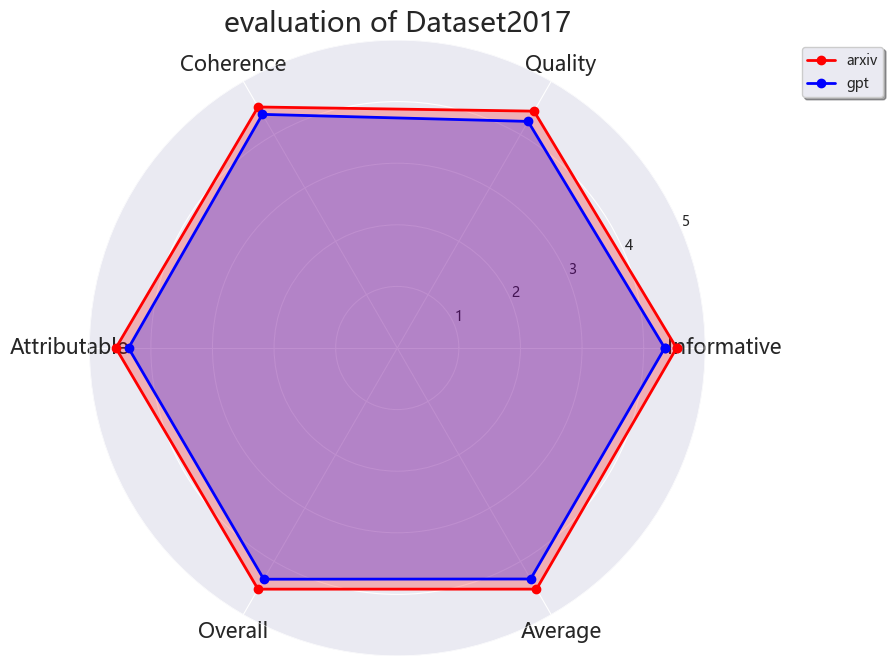

In [32]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import warnings


def plot_radar(metrics,
               metrics_names,
               labels=None,
               title=None):
    warnings.filterwarnings("ignore")

    if isinstance(metrics[0],list):
        metrics = np.array(metrics)
    else:
        metrics = np.array([metrics])
    angles = np.linspace(0,2*np.pi,len(metrics[0])+1,endpoint=True)  
    
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,polar=True)
    # set range of polar axis
    plt.ylim(0,5)
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False #
    colors = ['red','blue','green','yellow','black']
    labels = labels if labels else metrics_names
    for i,data in enumerate(metrics):
        data = np.concatenate((data,[data[0]])) # ensure the polygon is closed
        ax.plot(angles,data,'o-',linewidth=2,color=colors[i],label=labels[i])
        ax.fill(angles,data,alpha=0.25,color=colors[i])
    display_names = metrics_names
    ax.set_thetagrids(angles[:-1]*180/np.pi,display_names,fontsize=15)
    plt.legend(loc='upper right',bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    ax.grid(True)
    ax.spines['polar'].set_visible(False)
    plt.title(title,fontsize=20)

data_2017 =  """
arxiv_Informative        4.534
arxiv_Quality             4.44
arxiv_Coherence          4.518
arxiv_Attributable       4.568
arxiv_Overall           4.5206
gpt_Informative       4.342167
gpt_Quality             4.2475
gpt_Coherence           4.3795
gpt_Attributable      4.362833
gpt_Overall           4.334067
"""

data_2023 = """
arxiv_Informative     4.497959
arxiv_Quality          4.37551
arxiv_Coherence       4.455102
arxiv_Attributable    4.438776
arxiv_Overall         4.454082
gpt_Informative       4.417687
gpt_Quality           4.320408
gpt_Coherence         4.457143
gpt_Attributable      4.657823
gpt_Overall           4.459048
"""

metrics_names = ["Informative","Quality","Coherence","Attributable","Overall","Average"]
metrics_2017 = [[4.534,4.44,4.518,4.568,4.5206,4.52],[4.342167,4.2475,4.3795,4.362833,4.334067,4.33]]
metrics_2023 = [[4.497959,4.37551,4.455102,4.438776,4.454082,4.46],[4.417687,4.320408,4.457143,4.657823,4.459048,4.46]]
labels = ["arxiv","gpt"]
plot_radar(metrics_2017,metrics_names,labels=labels,title="evaluation of Dataset2017")


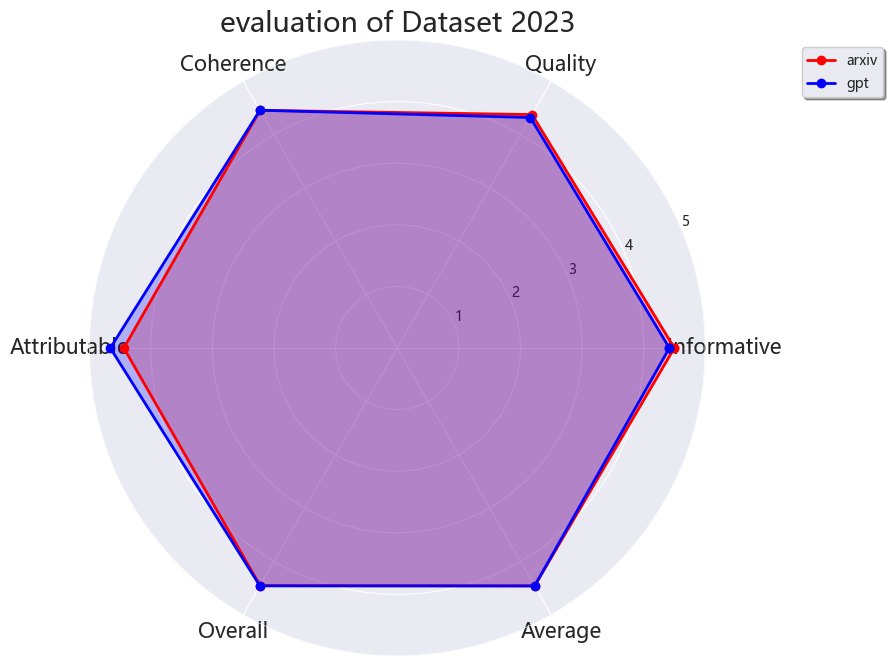

In [33]:
plot_radar(metrics_2023,metrics_names,labels=labels,title="evaluation of Dataset 2023")